In [403]:
import scipy
import matplotlib
import pandas as pd
import sklearn
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.impute import SimpleImputer

data=read_csv('train.csv')
data.index=range(1,len(data)+1)
print(data.shape)
data.head(5)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [404]:
data.loc[:,'Id']

1          1
2          2
3          3
4          4
5          5
        ... 
1456    1456
1457    1457
1458    1458
1459    1459
1460    1460
Name: Id, Length: 1460, dtype: int64

In [405]:
data.groupby('YrSold').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
YrSold,,,,,,,,,,,,,,,,,,,,,
2006,314,314,314,265,314,314,19,314,314,314,...,314,314,4,52,8,314,314,314,314,314
2007,329,329,329,266,329,329,19,329,329,329,...,329,329,1,64,12,329,329,329,329,329
2008,304,304,304,254,304,304,27,304,304,304,...,304,304,2,58,9,304,304,304,304,304
2009,338,338,338,273,338,338,20,338,338,338,...,338,338,0,67,11,338,338,338,338,338
2010,175,175,175,143,175,175,6,175,175,175,...,175,175,0,40,14,175,175,175,175,175


In [406]:
data.groupby('YrSold').size()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
dtype: int64

In [407]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [408]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 1 to 1460
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [409]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [410]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
X=data.drop('SalePrice',axis=1)
Y=data.values[:,80]
num=X.isnull().sum()
print(num[num>0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [411]:
miss_col=[col for col in X.columns if(X[col].isnull().any())]
print(miss_col)
X=X.drop(miss_col,axis=1)
obj_col=[col for col in X.columns if(X[col].dtype=='object')]
num_col=[col for col in X.columns if(X[col].dtype!='object')]
X_num=X[num_col]

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [412]:
X_train,X_val,Y_train,Y_val=train_test_split(X_num,Y,test_size=0.2,random_state=0)

In [413]:
model1=LinearRegression(normalize=True)
model1.fit(X_train,Y_train)
Y_prediction=model1.predict(X_val)
Y_prediction=Y_prediction.astype('int64')
print(mean_absolute_error(Y_val,Y_prediction))
print(len(Y_val),len(Y_prediction))
#print('confusion_matrix:',confusion_matrix(Y_val,Y_prediction))
#print('classification_report:',classification_report(Y_val,Y_prediction))
#print('Accuracy Score:',accuracy_score(Y_val,Y_prediction)*100)
print(model1.coef_)
print(r2_score(Y_val,Y_prediction))
print(mean_squared_error(Y_val,Y_prediction))

23844.921232876713
292 292
[ 7.63193695e-01 -1.38605454e+02  4.56056145e-01  1.62138361e+04
  4.36307075e+03  3.22182752e+02  1.76825472e+02  7.23757780e+13
  7.23757780e+13  7.23757780e+13 -7.23757780e+13 -1.25637779e+14
 -1.25637779e+14 -1.25637779e+14  1.25637779e+14  1.57768489e+03
  9.44391179e+02  2.40181145e+03 -7.04127368e+01 -1.11118196e+04
 -1.52180019e+04  5.28105833e+03  3.56144748e+03  2.52407542e+03
  2.61250104e+01  1.54736600e+01  1.85737488e+00 -4.58351305e+00
  2.01580626e+01  2.26393749e+01  1.87153058e+01 -8.92400898e-01
 -4.12284758e+02 -5.48096806e+02]
0.6430015643936404
2465377633.6815066


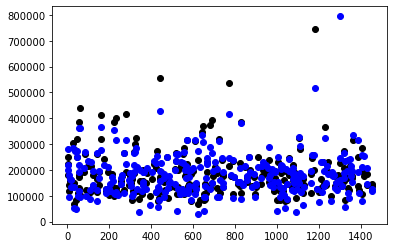

In [414]:
plt.scatter(X_val['Id'],Y_val,  color='black')
plt.scatter(X_val['Id'],Y_prediction, color='blue')

plt.show()

In [415]:
X_new=data.drop('SalePrice',axis=1)
miss_col_new=[col for col in X_new.columns if(X_new[col].isnull().sum()>=1000)]
print(miss_col_new)
X_new=X_new.drop(miss_col_new,axis=1)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [416]:
obj_col_new=[col for col in X_new.columns if(X_new[col].dtype=='object')]
num_col_new=[col for col in X_new.columns if(X_new[col].dtype!='object')]
X_num_new=X_new[num_col_new]
RP=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=None)
X_imputed=pd.DataFrame(RP.fit_transform(X_num_new))
X_imputed.columns=X_num_new.columns

In [417]:
X_train_n,X_val_n,Y_train_n,Y_val_n=train_test_split(X_imputed,Y,test_size=0.2,random_state=0)

In [418]:
model2=LinearRegression(normalize=True)
model2.fit(X_train_n,Y_train_n)
Y_pred=model2.predict(X_val_n)
Y_pred=Y_pred.astype('int64')
print(mean_absolute_error(Y_val_n,Y_pred))
print(len(Y_val_n),len(Y_pred))
#print('confusion_matrix:',confusion_matrix(Y_val,Y_prediction))
#print('classification_report:',classification_report(Y_val,Y_prediction))
#print('Accuracy Score:',accuracy_score(Y_val,Y_prediction)*100)
print(model2.coef_)
print(r2_score(Y_val_n,Y_pred))
print(mean_squared_error(Y_val_n,Y_pred))

23577.342465753423
292 292
[ 1.03962318e+00 -1.29075653e+02  7.97750362e+01  4.51031523e-01
  1.52162013e+04  5.24909997e+03  3.27427798e+02  1.56021214e+02
  2.96777762e+01 -5.50603186e+13 -5.50603186e+13 -5.50603186e+13
  5.50603186e+13 -1.10966325e+14 -1.10966325e+14 -1.10966325e+14
  1.10966325e+14  2.02753161e+03 -4.57048338e-01  2.72720297e+03
 -6.91595692e+02 -1.13640852e+04 -1.88840660e+04  5.23399017e+03
  4.11743970e+03 -1.28353155e+01  6.23295832e+03  2.92638832e+01
  1.66094552e+01  1.70316909e+00  1.44993016e+00  2.63040970e+01
  2.30560917e+01  2.19168705e+01 -2.72905059e-01 -3.24407626e+02
 -4.22045797e+02]
0.6437713873167963
2460061352.0753427


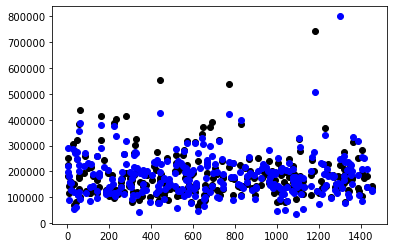

In [419]:
plt.scatter(X_val_n['Id'],Y_val_n,  color='black')
plt.scatter(X_val_n['Id'],Y_pred, color='blue')

plt.show()